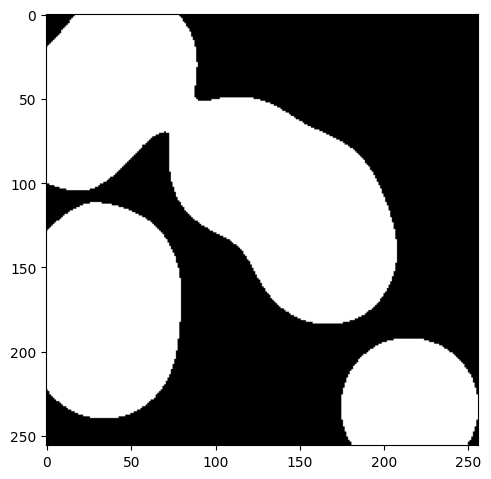

In [4]:
from skimage import data, measure
import skimage as sk
import matplotlib.pyplot as plt

IG = data.binary_blobs(length=256, blob_size_fraction=0.3,volume_fraction=0.5)

fig = plt.figure(figsize=(5,5))
plt.imshow(IG,cmap='gray')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


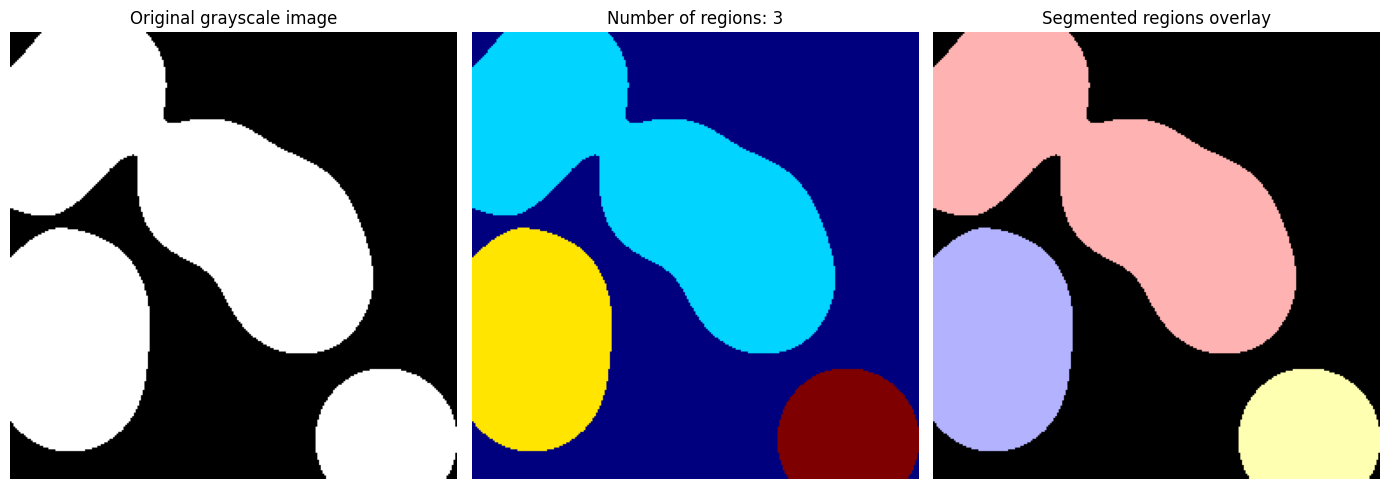

In [5]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df_features = pd.DataFrame(props)
df_features.head()


,label,area,eccentricity,extent,axis_major_length
0,1,19625.0,0.923190,0.512777,276.072776
1,2,8786.0,0.767162,0.858008,132.803598
2,3,4357.0,0.614089,0.853811,84.706120


<Axes: xlabel='axis_major_length', ylabel='area'>

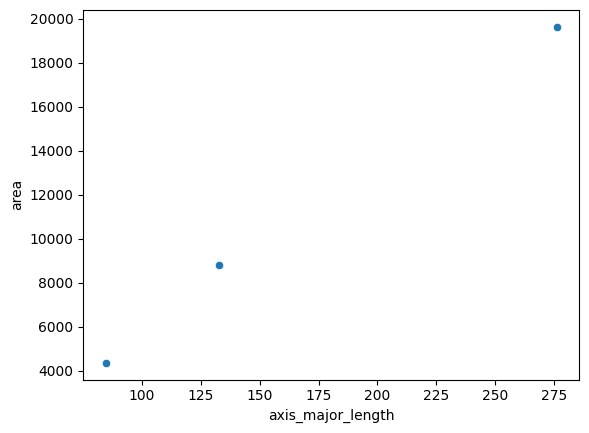

In [7]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

In [8]:
df_features.loc[df_features['area']>=df_features['area'].mean()]

,label,area,eccentricity,extent,axis_major_length
0,1,19625.0,0.92319,0.512777,276.072776


In [9]:
mean_blobs_area = df_features['area'].mean()
df_large_blobs = df_features.loc[df_features['area']>=mean_blobs_area]
N_large = df_large_blobs.shape[0]
print('there are {} blobs with an area larger or equal the mean area {}'.format(N_large,mean_blobs_area))


there are 1 blobs with an area larger or equal the mean area 10922.666666666666


In [10]:
labels_small = df_small_blobs['label'].values
print('labels of small blobs: {}'.format(labels_small))
labels_large = df_large_blobs['label'].values
print('labels of large blobs: {}'.format(labels_large))


NameError: name 'df_small_blobs' is not defined